<a href="https://colab.research.google.com/github/jay-madane/ML_clg_labs/blob/main/ml_lab2(b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning 2
##Support Vector Machine (SVM)

####Name: Jay Kiran Madane
####PRN: RBT21CB036
####Title: Wine Classification using Support Vector Machine (SVM).
####Aim: The aim of this project is to develop a model using Support Vector Machine (SVM) that can accurately predict the classes based on various features of wine.
####Theory:
Support Vector Machine (SVM) is a supervised machine learning algorithm used for both
classification and regression. Though we say regression problems as well it's best suited for
classification.

The main objective of the SVM algorithm is to find the optimal hyperplane in an Ndimensional space that can separate the data points in different classes in the feature space. The
hyperplane tries that the margin between the closest points of different classes should be as
maximum as possible. The dimension of the hyperplane depends upon the number of features. If the
number of input features is two, then the hyperplane is just a line.

If the number of input
features is three, then the hyperplane becomes a 2-D plane. It becomes difficult to imagine when
the number of features exceeds three.


#### Code:

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#### Step 1: Data Preprocessing

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
data = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names'] + ['target'])

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Step 2: Data Visualization

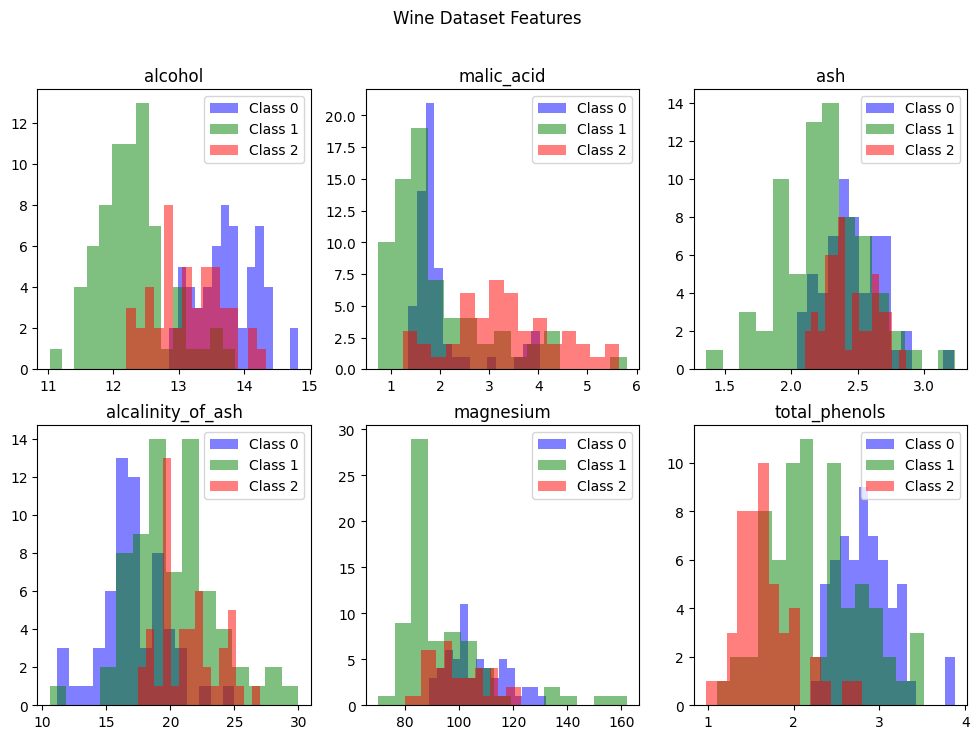

In [ ]:
# Let's visualize some features of the wine dataset
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Wine Dataset Features')

for i in range(3):
    for j in range(2):
        feature_name = wine['feature_names'][i + j * 3]
        axes[j, i].hist(X[y == 0][feature_name], bins=15, alpha=0.5, label='Class 0', color='b')
        axes[j, i].hist(X[y == 1][feature_name], bins=15, alpha=0.5, label='Class 1', color='g')
        axes[j, i].hist(X[y == 2][feature_name], bins=15, alpha=0.5, label='Class 2', color='r')
        axes[j, i].set_title(feature_name)
        axes[j, i].legend()

plt.show()


#### Step 3: Naive Bayes Model Training

In [ ]:
svm_model = SVC(kernel='linear', C=1)  # You can adjust the kernel and C parameter as needed
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

#### Step 4: Model Evaluation

In [ ]:
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm, target_names=wine.target_names)

print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('SVM Confusion Matrix:\n', conf_matrix_svm)
print('SVM Classification Report:\n', class_report_svm)

SVM Accuracy: 1.00
SVM Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
SVM Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### Step 5: Visualization of Results

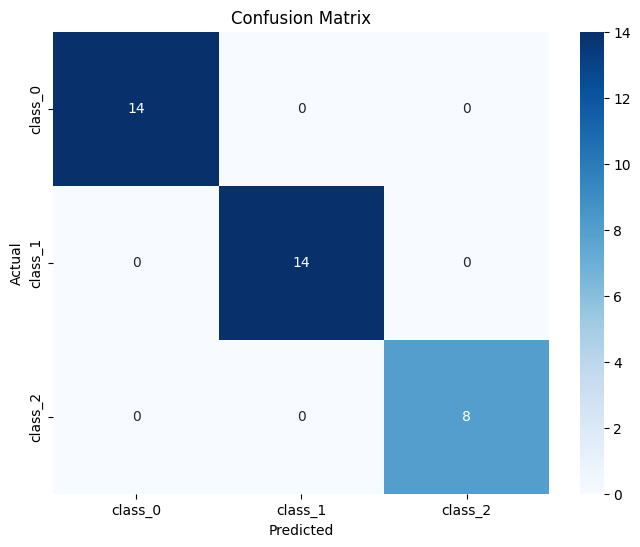

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

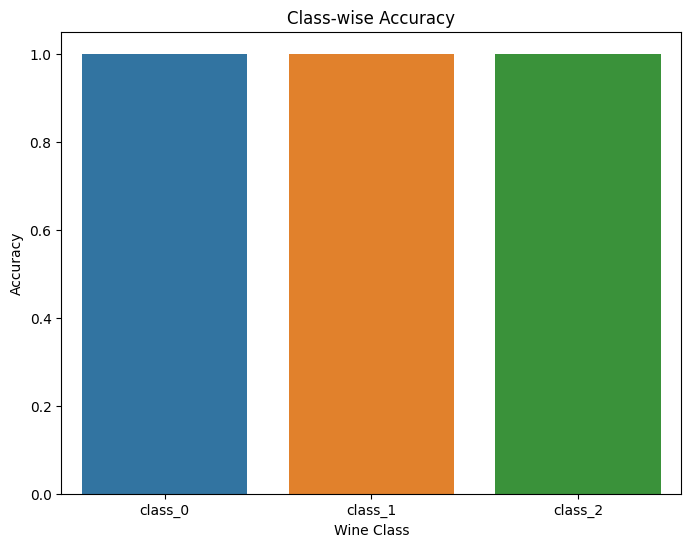

In [ ]:
# Class-wise Accuracy Visualization
class_accuracy = conf_matrix_svm.diagonal() / conf_matrix_svm.sum(axis=1)
plt.figure(figsize=(8, 6))
sns.barplot(x=wine.target_names, y=class_accuracy)
plt.xlabel('Wine Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()